## 1. Environment Setup and Imports
Ensure we're using the correct kernel and loading utils from the `src/` directory.

In [ ]:
import sys, os
sys.path.append(os.path.abspath("../src"))

# Torch & GNN
import torch
from torch_geometric.nn import GATConv

# Custom modules (fully modularized)
from load_elliptic_data import load_and_preprocess_elliptic_data
from data_utils_randomsplit import random_split
from model_gat import GATNet
from train_utils import set_seed, train_full, save_config
from config import SEEDS

print("All modules imported successfully.")


All modules imported successfully.


## 2. Load and Preprocess the Elliptic Dataset + Seed
This loads the data, maps transaction IDs to node indices, filters isolated nodes, and normalizes node features.


In [2]:
data = load_and_preprocess_elliptic_data("../elliptic_bitcoin_dataset")
print(data)

Data(x=[203769, 166], edge_index=[2, 234355], y=[203769])


## 3. Initialize the GAT Model
Set hyperparameters and move model/data to GPU/CPU if available.

In [4]:
# Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Hyperparameters (can be saved into config later)
hidden_channels = 8
heads = 8
dropout = 0.3
out_channels = 2
in_channels = data.x.shape[1]

# Model initialization
model = GATNet(
    in_channels=in_channels,
    hidden_channels=hidden_channels,
    out_channels=out_channels,
    heads=heads,
    dropout=dropout
).to(device)

data = data.to(device)
print(model)

GATNet(
  (gat1): GATConv(166, 8, heads=8)
  (gat2): GATConv(64, 2, heads=1)
)


## 4. Multi-seed Loop Training

This section splits the labeled data into a training and validation set. (70/30)
To preserve class distribution between "licit" and "illicit", we use `sklearn.model_selection.train_test_split` with stratification.

Running seed 42...
Epoch 001 | Loss: 1.3967 | Val Acc: 0.5878 | Val F1: 0.4600
Epoch 002 | Loss: 1.5293 | Val Acc: 0.6510 | Val F1: 0.5027
Epoch 003 | Loss: 1.2978 | Val Acc: 0.6893 | Val F1: 0.5317
Epoch 004 | Loss: 1.3537 | Val Acc: 0.7131 | Val F1: 0.5515
Epoch 005 | Loss: 1.3840 | Val Acc: 0.7331 | Val F1: 0.5664
Epoch 006 | Loss: 1.6391 | Val Acc: 0.7465 | Val F1: 0.5763
Epoch 007 | Loss: 0.9126 | Val Acc: 0.7568 | Val F1: 0.5844
Epoch 008 | Loss: 0.8251 | Val Acc: 0.7675 | Val F1: 0.5931
Epoch 009 | Loss: 0.7915 | Val Acc: 0.7763 | Val F1: 0.6012
Epoch 010 | Loss: 0.7517 | Val Acc: 0.7856 | Val F1: 0.6090
Epoch 011 | Loss: 0.7449 | Val Acc: 0.7940 | Val F1: 0.6165
Epoch 012 | Loss: 0.6844 | Val Acc: 0.8027 | Val F1: 0.6245
Epoch 013 | Loss: 0.7156 | Val Acc: 0.8097 | Val F1: 0.6315
Epoch 014 | Loss: 0.6330 | Val Acc: 0.8175 | Val F1: 0.6384
Epoch 015 | Loss: 0.7589 | Val Acc: 0.8241 | Val F1: 0.6438
Epoch 016 | Loss: 0.6497 | Val Acc: 0.8304 | Val F1: 0.6500
Epoch 017 | Loss: 0.6

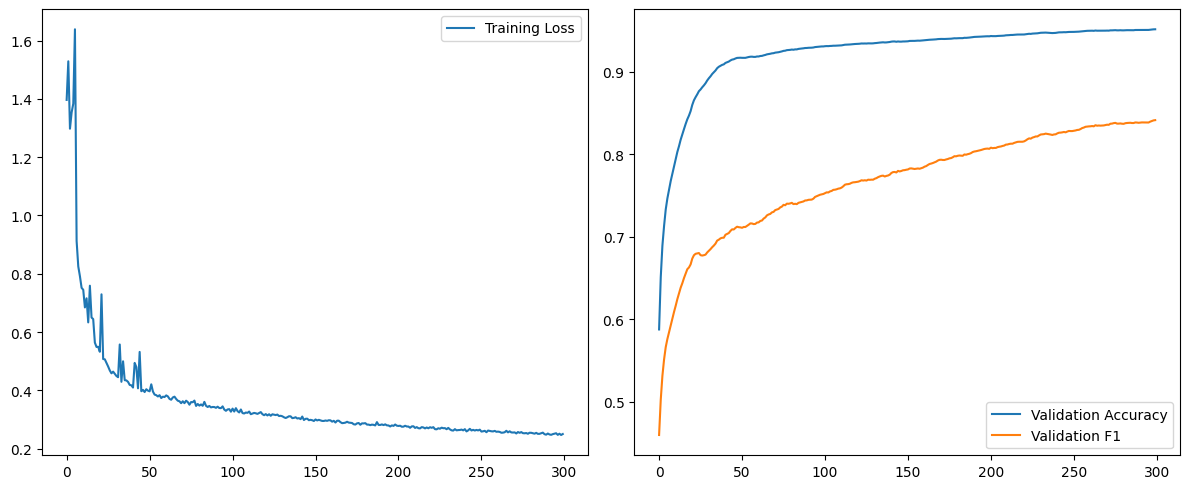

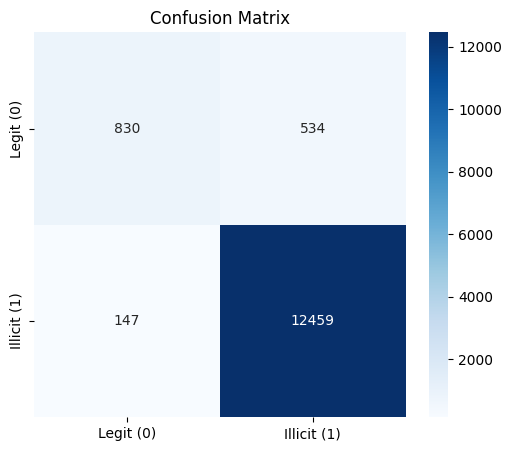

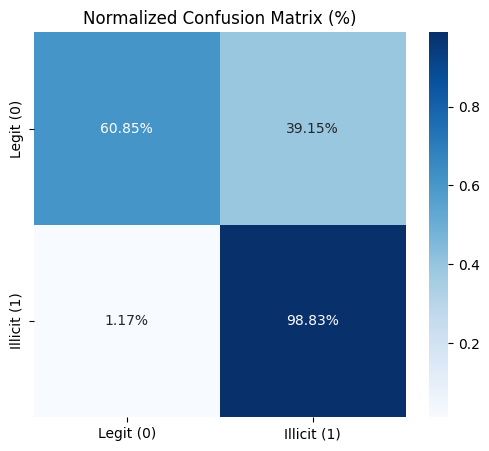

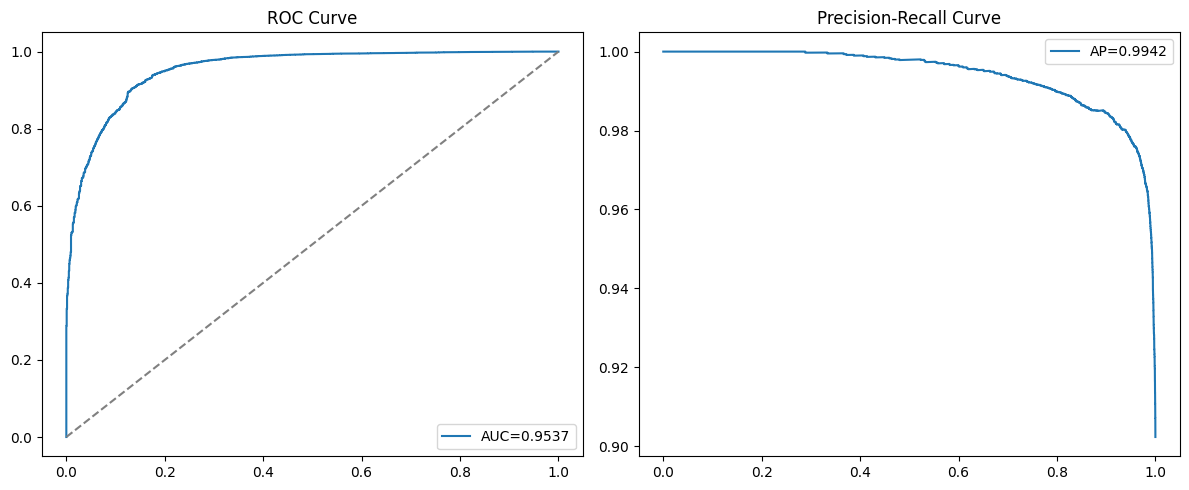

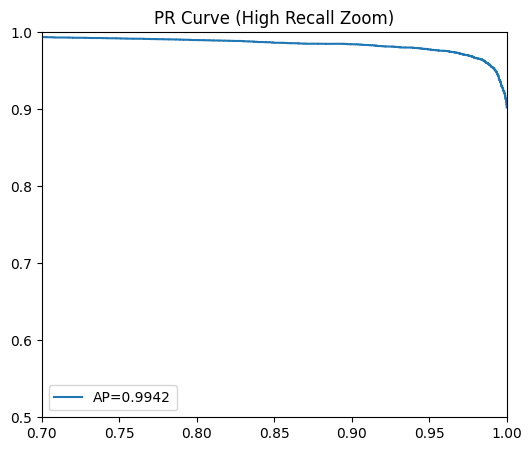

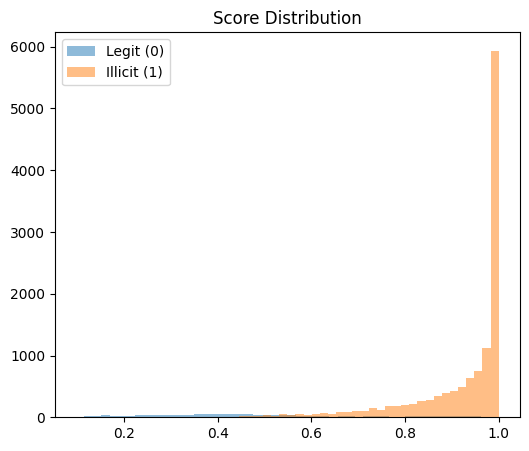

Running seed 123...
Epoch 001 | Loss: 3.3622 | Val Acc: 0.3893 | Val F1: 0.3513
Epoch 002 | Loss: 3.1337 | Val Acc: 0.4334 | Val F1: 0.3839
Epoch 003 | Loss: 2.7920 | Val Acc: 0.4732 | Val F1: 0.4114
Epoch 004 | Loss: 2.4000 | Val Acc: 0.5125 | Val F1: 0.4381
Epoch 005 | Loss: 2.0101 | Val Acc: 0.5508 | Val F1: 0.4637
Epoch 006 | Loss: 2.2119 | Val Acc: 0.5797 | Val F1: 0.4829
Epoch 007 | Loss: 1.7479 | Val Acc: 0.6074 | Val F1: 0.5006
Epoch 008 | Loss: 1.8520 | Val Acc: 0.6316 | Val F1: 0.5166
Epoch 009 | Loss: 1.5635 | Val Acc: 0.6514 | Val F1: 0.5302
Epoch 010 | Loss: 1.6326 | Val Acc: 0.6719 | Val F1: 0.5441
Epoch 011 | Loss: 1.3964 | Val Acc: 0.6928 | Val F1: 0.5583
Epoch 012 | Loss: 1.1776 | Val Acc: 0.7079 | Val F1: 0.5686
Epoch 013 | Loss: 1.2022 | Val Acc: 0.7213 | Val F1: 0.5777
Epoch 014 | Loss: 1.1074 | Val Acc: 0.7344 | Val F1: 0.5870
Epoch 015 | Loss: 1.0135 | Val Acc: 0.7466 | Val F1: 0.5962
Epoch 016 | Loss: 0.8402 | Val Acc: 0.7583 | Val F1: 0.6055
Epoch 017 | Loss: 0.

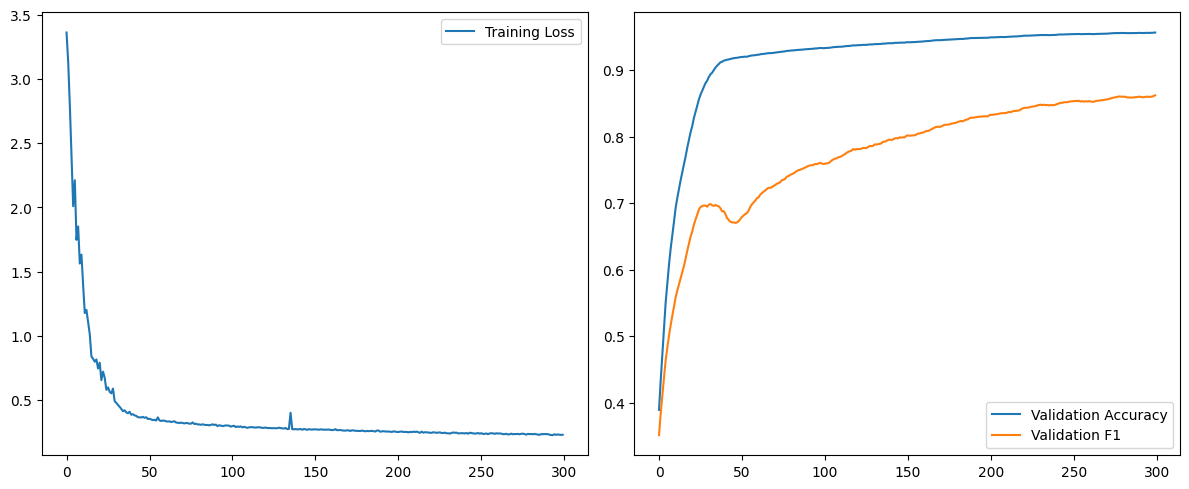

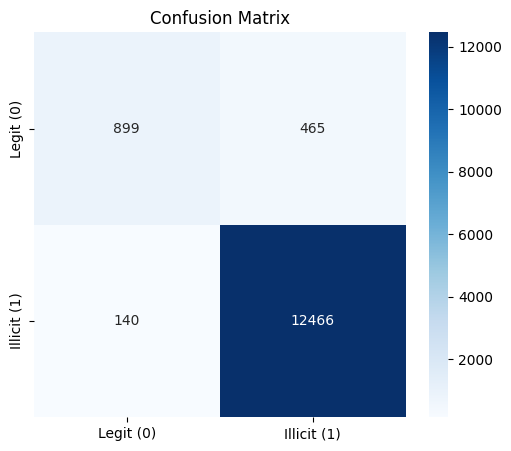

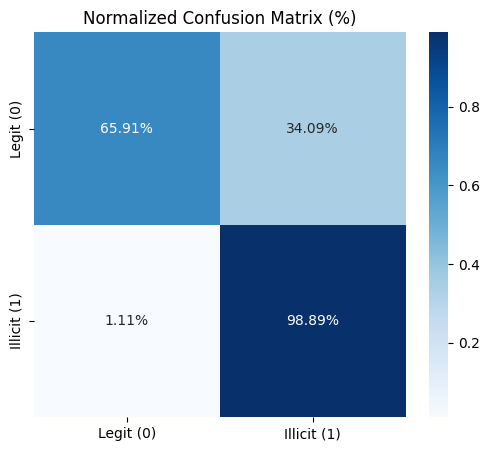

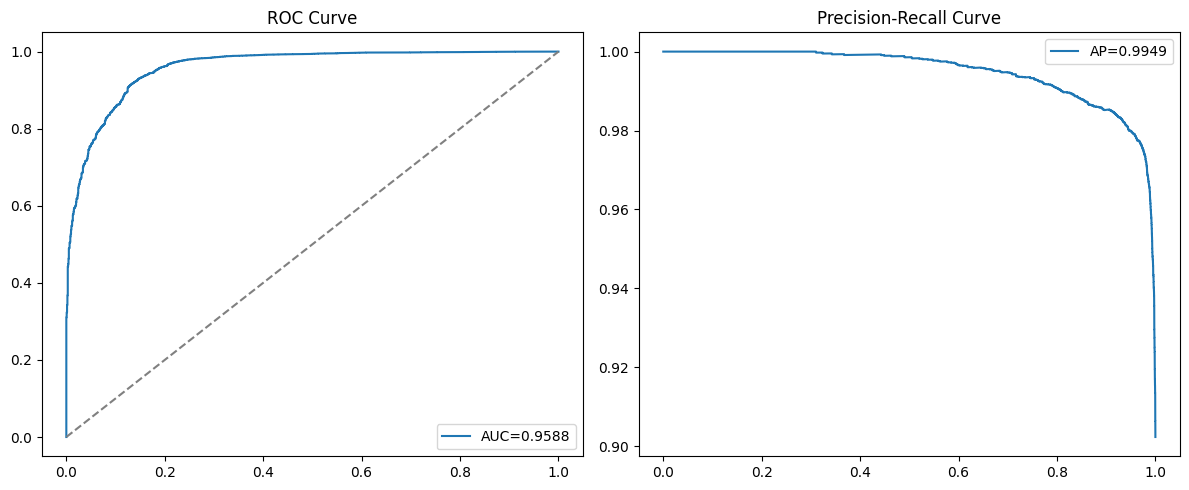

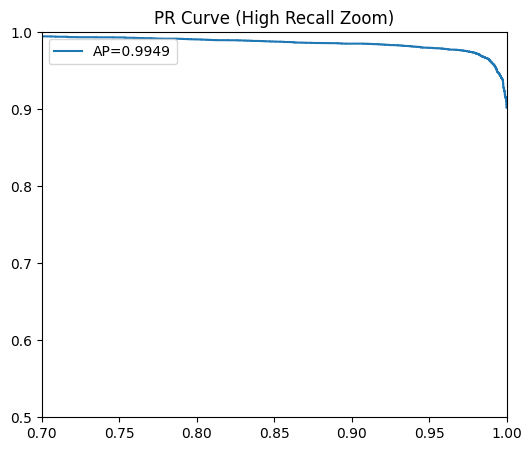

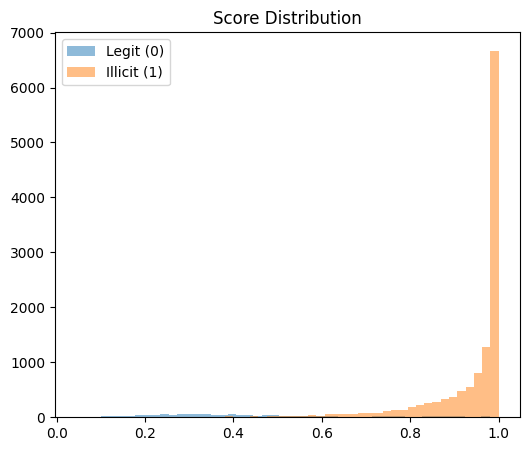

Running seed 777...
Epoch 001 | Loss: 3.3972 | Val Acc: 0.3960 | Val F1: 0.3477
Epoch 002 | Loss: 3.5529 | Val Acc: 0.4283 | Val F1: 0.3710
Epoch 003 | Loss: 2.6531 | Val Acc: 0.4716 | Val F1: 0.4017
Epoch 004 | Loss: 2.4465 | Val Acc: 0.5152 | Val F1: 0.4327
Epoch 005 | Loss: 2.3687 | Val Acc: 0.5611 | Val F1: 0.4657
Epoch 006 | Loss: 1.9454 | Val Acc: 0.5956 | Val F1: 0.4909
Epoch 007 | Loss: 2.0913 | Val Acc: 0.6251 | Val F1: 0.5127
Epoch 008 | Loss: 1.6274 | Val Acc: 0.6476 | Val F1: 0.5296
Epoch 009 | Loss: 1.3504 | Val Acc: 0.6654 | Val F1: 0.5420
Epoch 010 | Loss: 1.1442 | Val Acc: 0.6879 | Val F1: 0.5580
Epoch 011 | Loss: 1.1751 | Val Acc: 0.7096 | Val F1: 0.5734
Epoch 012 | Loss: 1.0524 | Val Acc: 0.7281 | Val F1: 0.5866
Epoch 013 | Loss: 0.9859 | Val Acc: 0.7426 | Val F1: 0.5974
Epoch 014 | Loss: 0.9024 | Val Acc: 0.7582 | Val F1: 0.6105
Epoch 015 | Loss: 0.8474 | Val Acc: 0.7711 | Val F1: 0.6212
Epoch 016 | Loss: 0.7872 | Val Acc: 0.7822 | Val F1: 0.6309
Epoch 017 | Loss: 0.

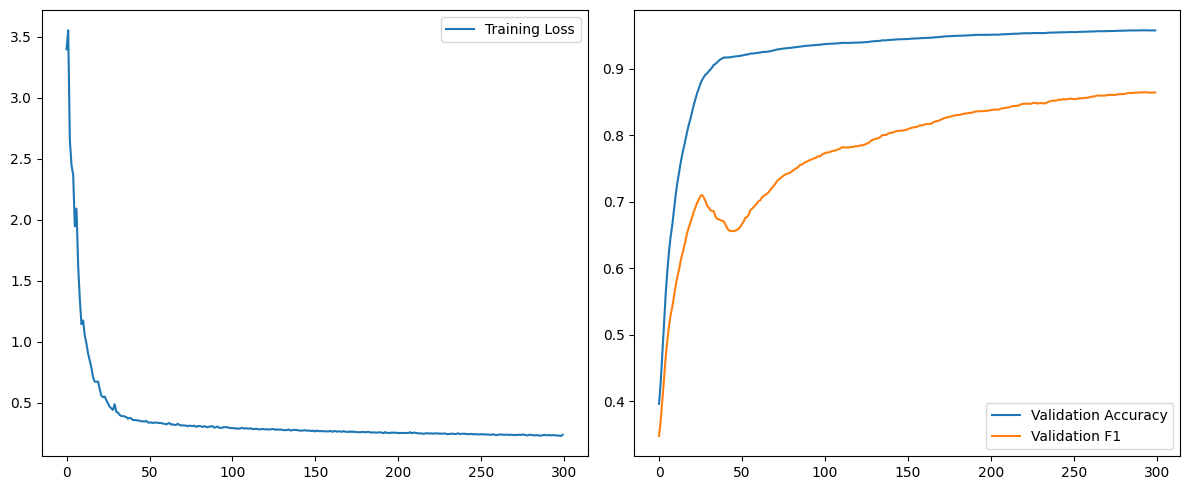

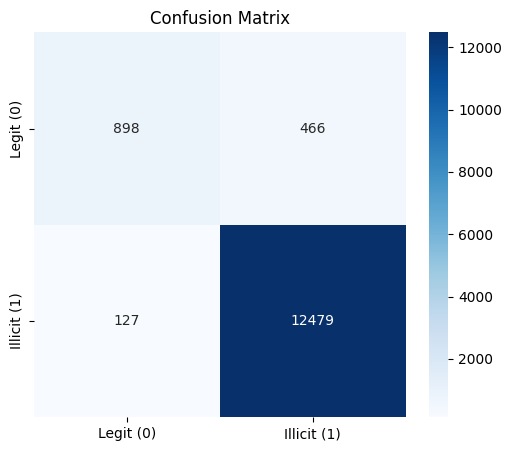

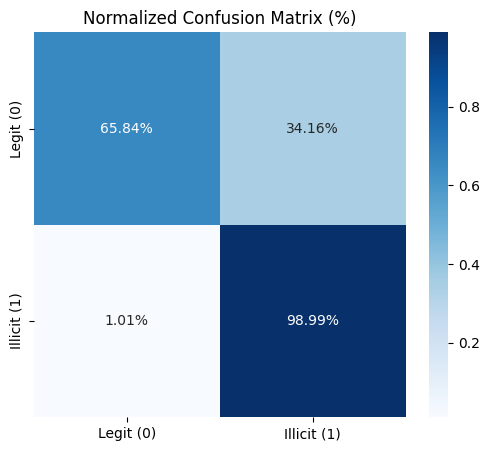

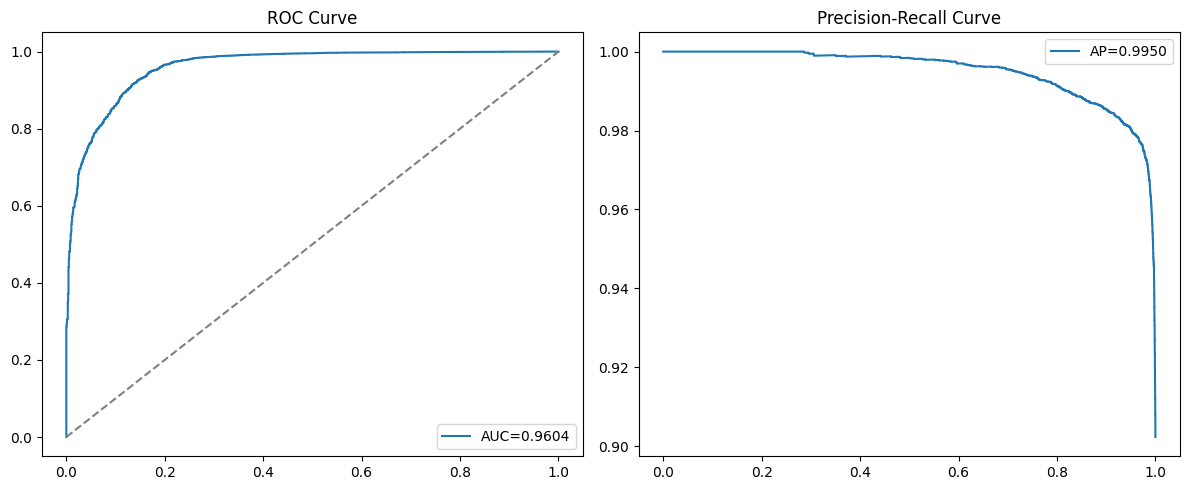

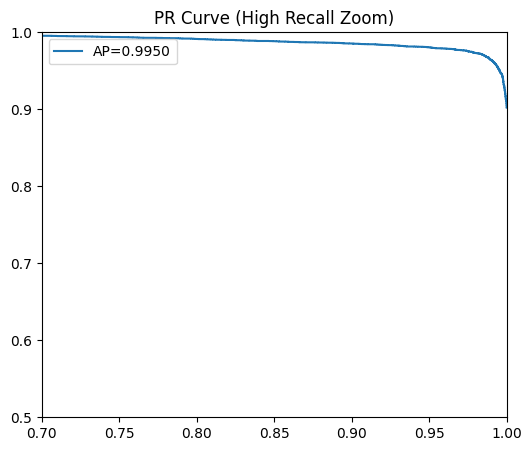

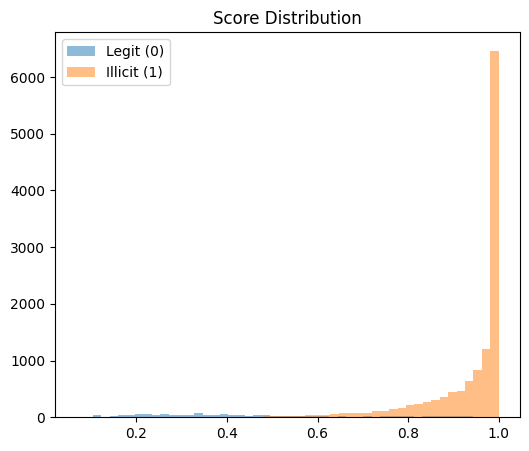

Running seed 2023...
Epoch 001 | Loss: 1.3001 | Val Acc: 0.5215 | Val F1: 0.4035
Epoch 002 | Loss: 1.1844 | Val Acc: 0.5604 | Val F1: 0.4298
Epoch 003 | Loss: 1.0617 | Val Acc: 0.6053 | Val F1: 0.4594
Epoch 004 | Loss: 0.9569 | Val Acc: 0.6441 | Val F1: 0.4846
Epoch 005 | Loss: 0.8873 | Val Acc: 0.6803 | Val F1: 0.5117
Epoch 006 | Loss: 0.7936 | Val Acc: 0.7158 | Val F1: 0.5427
Epoch 007 | Loss: 0.7518 | Val Acc: 0.7470 | Val F1: 0.5702
Epoch 008 | Loss: 0.6923 | Val Acc: 0.7759 | Val F1: 0.5962
Epoch 009 | Loss: 0.6451 | Val Acc: 0.7936 | Val F1: 0.6125
Epoch 010 | Loss: 0.6184 | Val Acc: 0.8043 | Val F1: 0.6223
Epoch 011 | Loss: 0.5981 | Val Acc: 0.8128 | Val F1: 0.6295
Epoch 012 | Loss: 0.5755 | Val Acc: 0.8193 | Val F1: 0.6342
Epoch 013 | Loss: 0.5506 | Val Acc: 0.8253 | Val F1: 0.6379
Epoch 014 | Loss: 0.5459 | Val Acc: 0.8322 | Val F1: 0.6438
Epoch 015 | Loss: 0.5142 | Val Acc: 0.8399 | Val F1: 0.6503
Epoch 016 | Loss: 0.5063 | Val Acc: 0.8467 | Val F1: 0.6535
Epoch 017 | Loss: 0

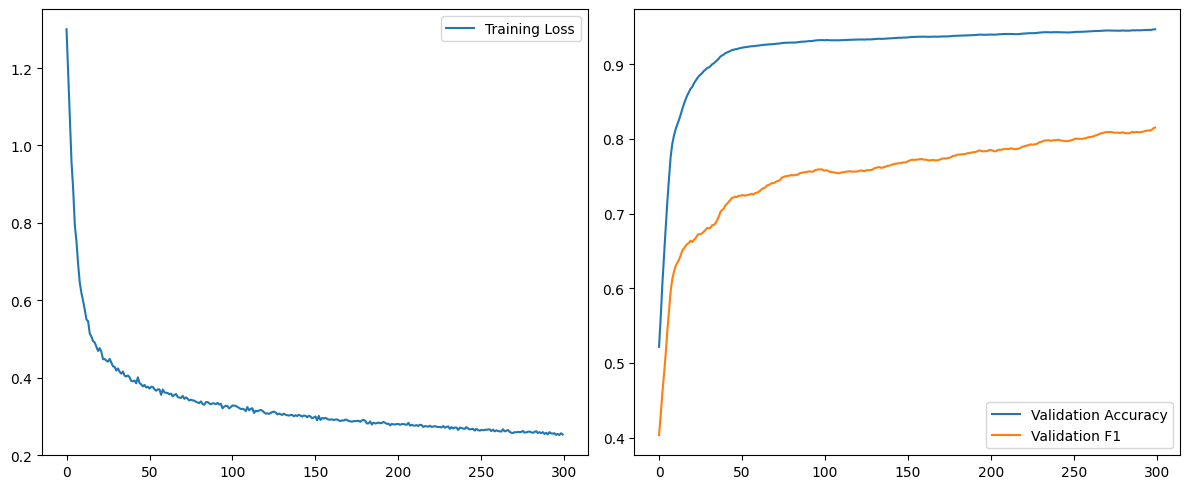

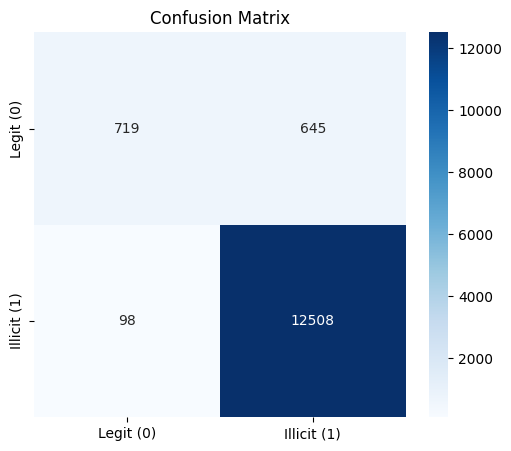

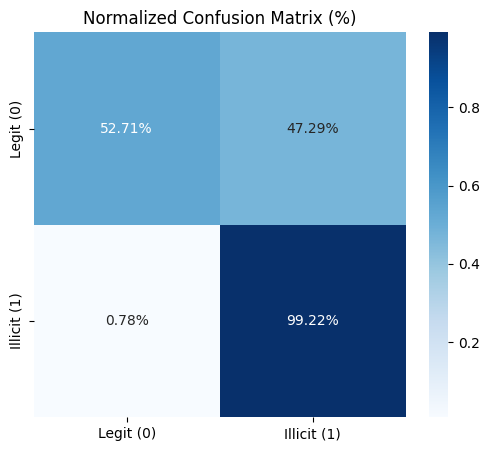

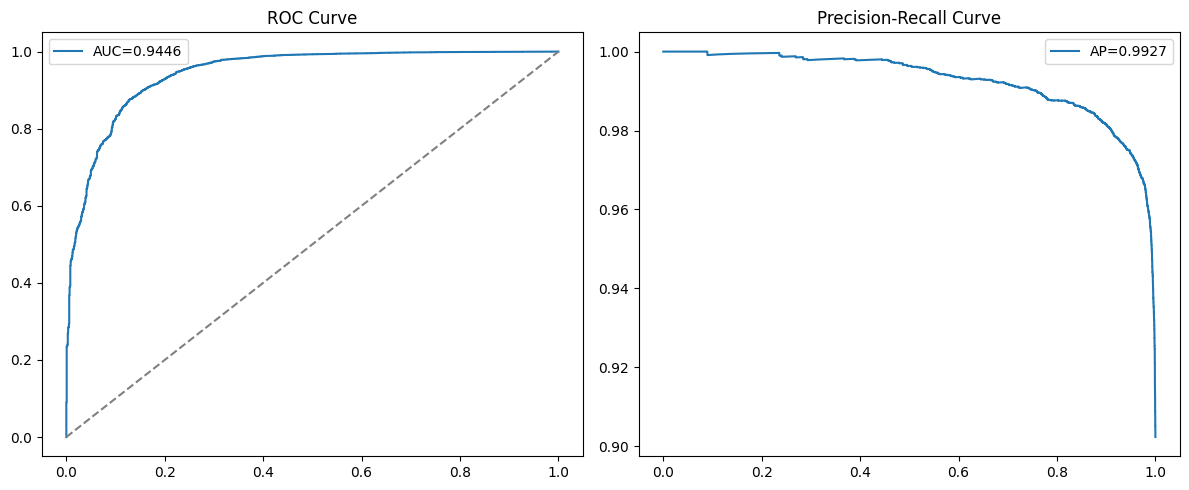

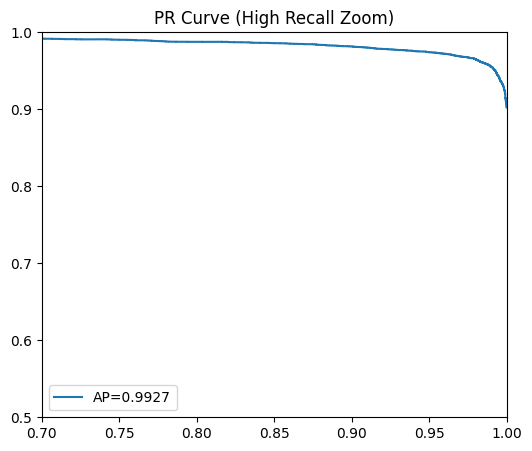

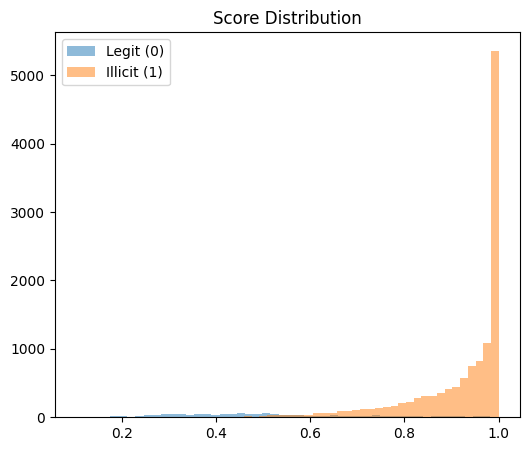

Running seed 31415...
Epoch 001 | Loss: 1.7046 | Val Acc: 0.6305 | Val F1: 0.4864
Epoch 002 | Loss: 1.4950 | Val Acc: 0.6877 | Val F1: 0.5296
Epoch 003 | Loss: 1.2692 | Val Acc: 0.7241 | Val F1: 0.5613
Epoch 004 | Loss: 1.3077 | Val Acc: 0.7503 | Val F1: 0.5877
Epoch 005 | Loss: 1.1402 | Val Acc: 0.7659 | Val F1: 0.6032
Epoch 006 | Loss: 0.9229 | Val Acc: 0.7772 | Val F1: 0.6139
Epoch 007 | Loss: 0.9227 | Val Acc: 0.7825 | Val F1: 0.6182
Epoch 008 | Loss: 0.8393 | Val Acc: 0.7867 | Val F1: 0.6209
Epoch 009 | Loss: 0.8332 | Val Acc: 0.7937 | Val F1: 0.6257
Epoch 010 | Loss: 0.7824 | Val Acc: 0.8005 | Val F1: 0.6291
Epoch 011 | Loss: 0.7236 | Val Acc: 0.8086 | Val F1: 0.6336
Epoch 012 | Loss: 0.6931 | Val Acc: 0.8176 | Val F1: 0.6383
Epoch 013 | Loss: 1.1487 | Val Acc: 0.8243 | Val F1: 0.6418
Epoch 014 | Loss: 0.6699 | Val Acc: 0.8331 | Val F1: 0.6475
Epoch 015 | Loss: 1.0595 | Val Acc: 0.8411 | Val F1: 0.6528
Epoch 016 | Loss: 0.5848 | Val Acc: 0.8495 | Val F1: 0.6574
Epoch 017 | Loss: 

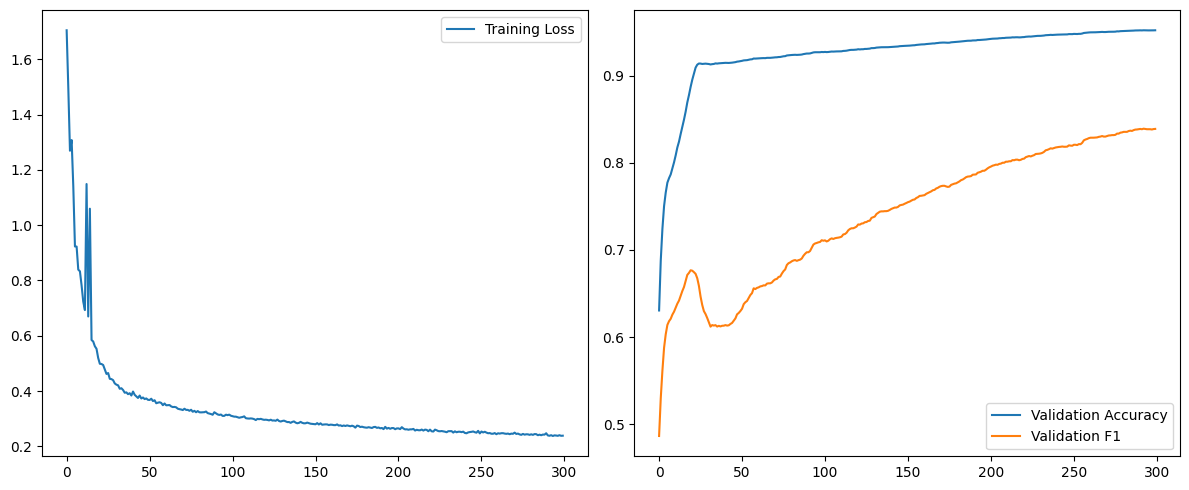

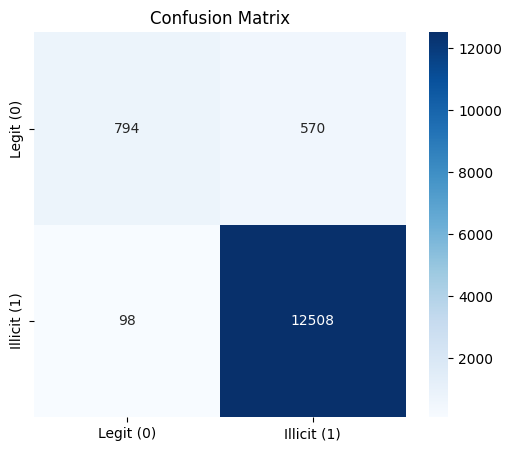

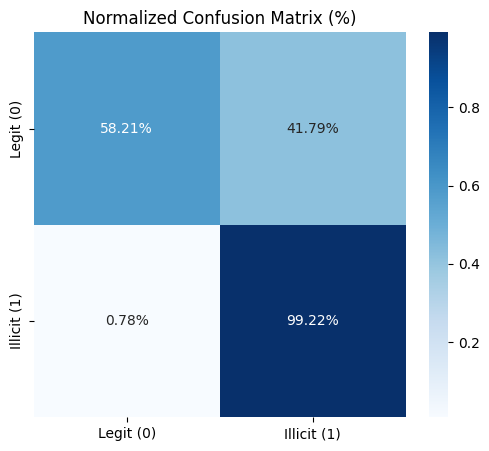

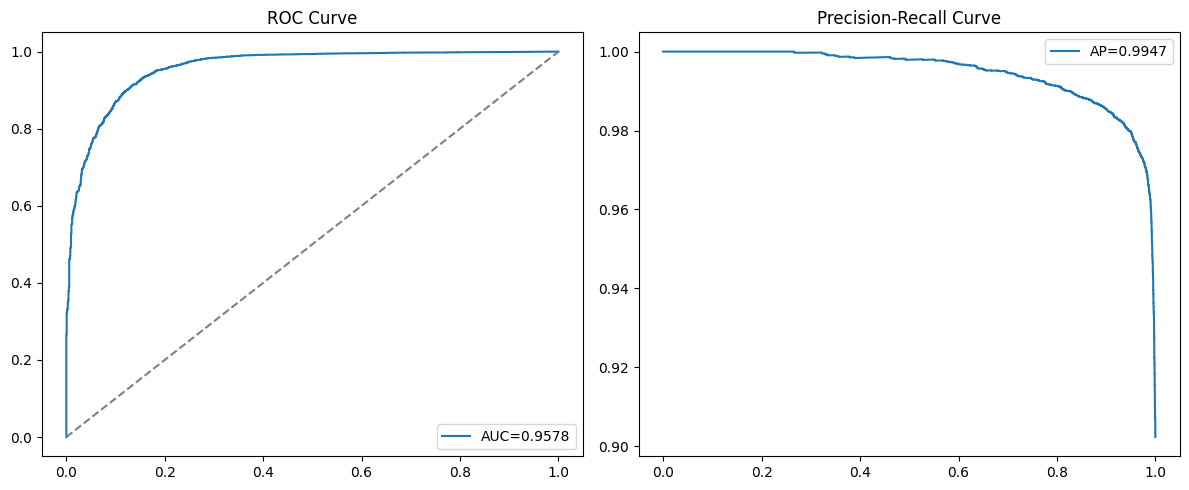

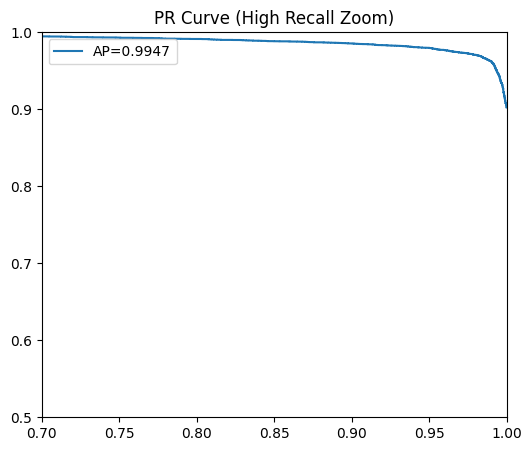

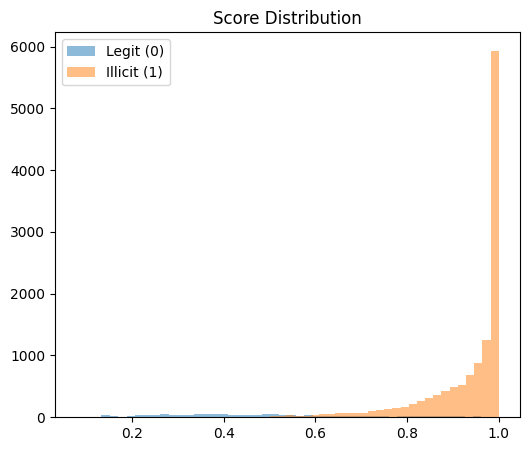

In [5]:
from train_multiseed import train_and_evaluate_multiseed
from config import SEEDS

for seed in SEEDS:
    print(f"Running seed {seed}...")
    train_and_evaluate_multiseed(seed, data, model_type="GAT")

## 5. Evaluation and Visualisation
### 5.1 Set up and Imports

In [1]:
# --- Section 5.0: Setup ---
import sys
sys.path.append("../src")

from evaluation_pipeline import (
    run_inference_all_seeds,
    plot_conf_matrices,
    summarize_classification_report,
    save_fp_fn_indices,
    attach_node_times
)

from analysis_utils import (
    load_metrics_across_seeds,
    aggregate_metrics_table,
    plot_loss_curve
)

from model_gat import GATNet
from load_elliptic_data import load_and_preprocess_elliptic_data

import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
seeds = [42, 123, 777, 2023, 31415]

# Load data
data = load_and_preprocess_elliptic_data("../elliptic_bitcoin_dataset").to(device)
model_class = GATNet
model_dir = "../models_v2/GAT"


### 5.2 Load Metrics from Logs and Loss Curve

,Metric,Mean,Std,Formatted
0,val_acc,0.9529,0.0039,0.9529 ± 0.0039
1,val_f1_macro,0.8444,0.0179,0.8444 ± 0.0179
2,val_f1_illicit,0.9743,0.0021,0.9743 ± 0.0021


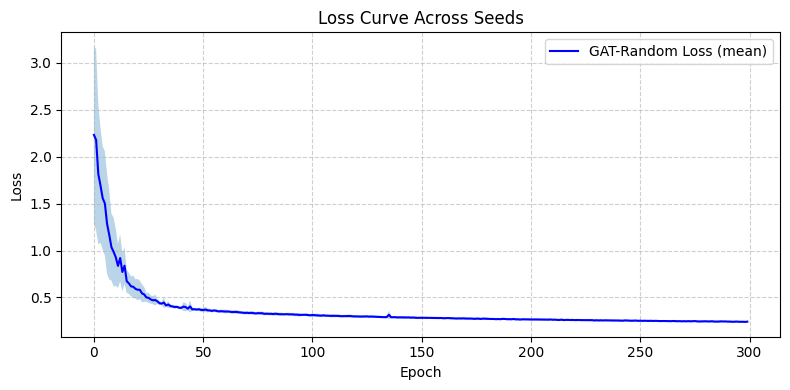

In [2]:
metrics_logs = load_metrics_across_seeds(model_dir, ["val_acc", "val_f1_macro", "val_f1_illicit", "loss"])
summary_df = aggregate_metrics_table(metrics_logs)
display(summary_df)
plot_loss_curve(metrics_logs["loss"], label="GAT-Random Loss")

### 5.3 Recompute PRedictions and Per-Seed Metrics

In [3]:
y_true_all, y_pred_all, y_proba_all, seed_metrics = run_inference_all_seeds(
    model_dir=model_dir,
    model_class=model_class,
    data=data,
    seeds=seeds
)


### 5.4 Confusion Matrix Analysis (Per-Seed and Aggregate)

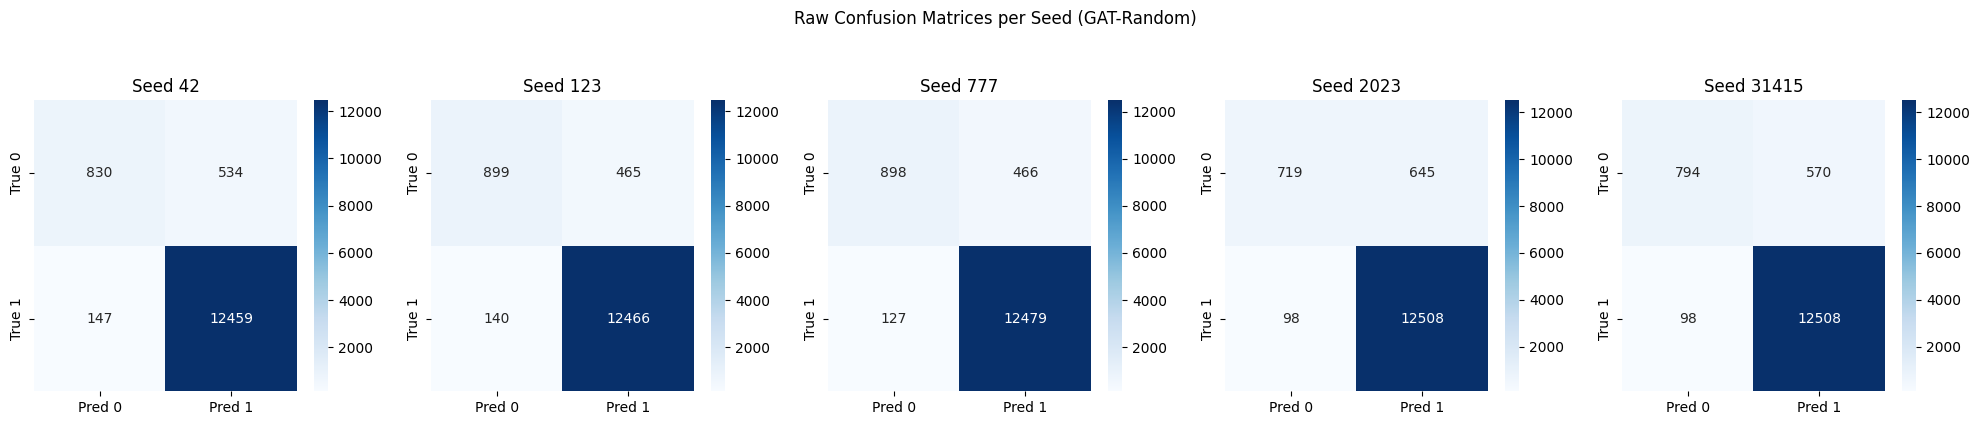

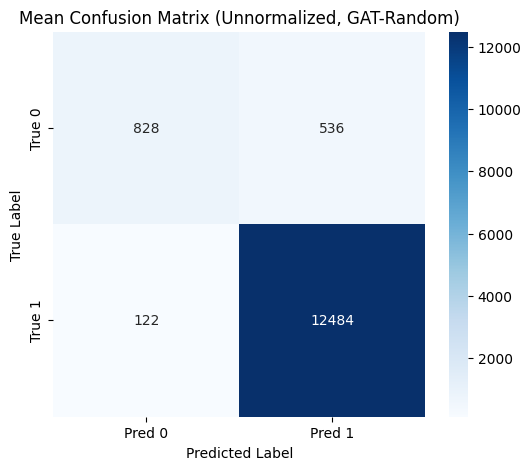

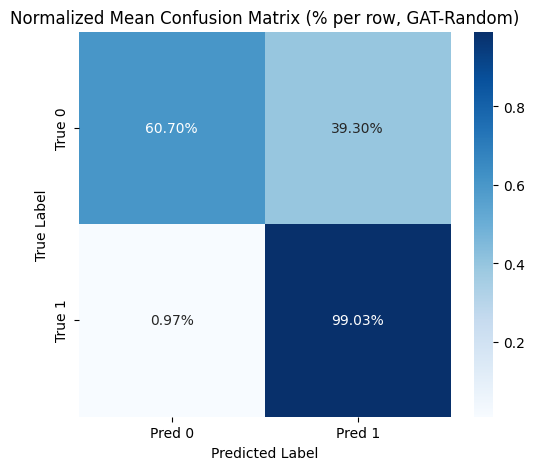

In [4]:
plot_conf_matrices(y_true_all, y_pred_all, seeds, model_name="GAT-Random")


### 5.5 Metric Distributions and Statistical Summaries

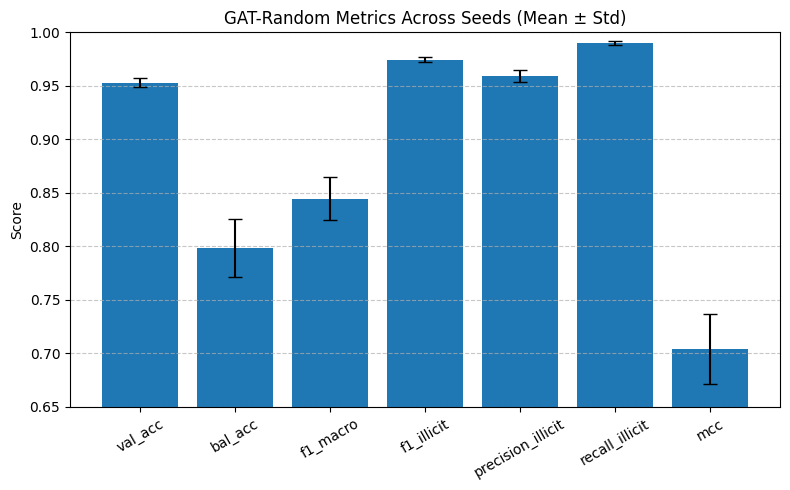

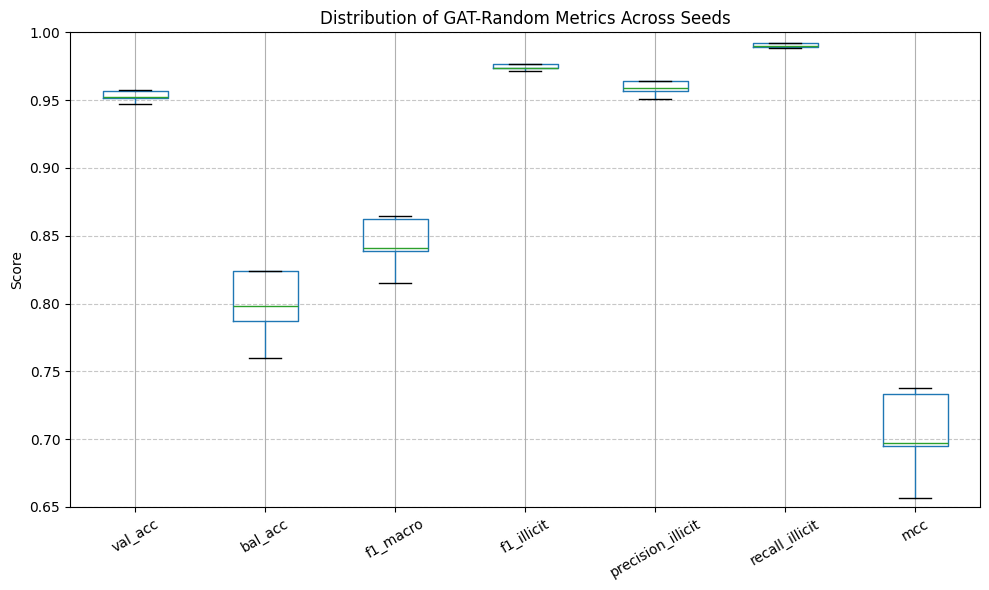

,Metric,Mean,Std,Formatted
0,val_acc,0.9529,0.0044,0.9529 ± 0.0044
1,bal_acc,0.7987,0.0271,0.7987 ± 0.0271
2,f1_macro,0.8444,0.0200,0.8444 ± 0.0200
3,f1_illicit,0.9743,0.0023,0.9743 ± 0.0023
4,precision_illicit,0.9589,0.0055,0.9589 ± 0.0055
5,recall_illicit,0.9903,0.0018,0.9903 ± 0.0018
6,mcc,0.7040,0.0330,0.7040 ± 0.0330


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Inject val_acc from metrics_logs into seed_metrics
val_acc_list = metrics_logs["val_acc"]  # comes from load_metrics_across_seeds(...)

# Add val_acc to each seed's metric dictionary
for i in range(len(seed_metrics)):
    seed_metrics[i]["val_acc"] = val_acc_list[i]

# Construct DataFrame from all metrics
df = pd.DataFrame(seed_metrics)

# Define core metrics to evaluate
main_metrics = ['val_acc', 'bal_acc', 'f1_macro', 'f1_illicit', 'precision_illicit', 'recall_illicit', 'mcc']

# Compute mean and std across seeds
means = df[main_metrics].mean()
stds = df[main_metrics].std()

# === Bar Plot (Mean ± Std) ===
plt.figure(figsize=(8, 5))
plt.bar(main_metrics, means, yerr=stds, capsize=5)
plt.ylim(0.65, 1.0)
plt.title("GAT-Random Metrics Across Seeds (Mean ± Std)")
plt.xticks(rotation=30)
plt.ylabel("Score")
plt.grid(True, axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

# === Boxplot (Seed-wise distribution) ===
plt.figure(figsize=(10, 6))
df[main_metrics].boxplot()
plt.ylim(0.65, 1.0)
plt.title("Distribution of GAT-Random Metrics Across Seeds")
plt.xticks(rotation=30)
plt.ylabel("Score")
plt.grid(True, axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

# === Summary Table (Mean ± Std, formatted for paper/report) ===
summary_table = pd.DataFrame({
    "Metric": main_metrics,
    "Mean": means.round(4).values,
    "Std": stds.round(4).values,
    "Formatted": [f"{m:.4f} ± {s:.4f}" for m, s in zip(means, stds)]
})

# Ensure order matches plot and report order
summary_table = summary_table.set_index("Metric").loc[main_metrics].reset_index()

display(summary_table)


### 5.6: Class-Wise Performance Summary (Precision, Recall, F1)

In [6]:
summarize_classification_report(y_true_all, y_pred_all)


Legit (0) Metrics:
precision: 0.8722 ± 0.0139
recall: 0.6070 ± 0.0497
f1-score: 0.7145 ± 0.0338

Illicit (1) Metrics:
precision: 0.9589 ± 0.0049
recall: 0.9903 ± 0.0016
f1-score: 0.9743 ± 0.0021


### 5.7: False Positive / False Negative (FP/FN) Analysis

In [7]:
save_fp_fn_indices(y_true_all, y_pred_all, seeds, model_dir)

### 5.8 Time Distribution of FP/FN Nodes

In [8]:
data = attach_node_times(data, "../elliptic_bitcoin_dataset/elliptic_txs_features.csv")

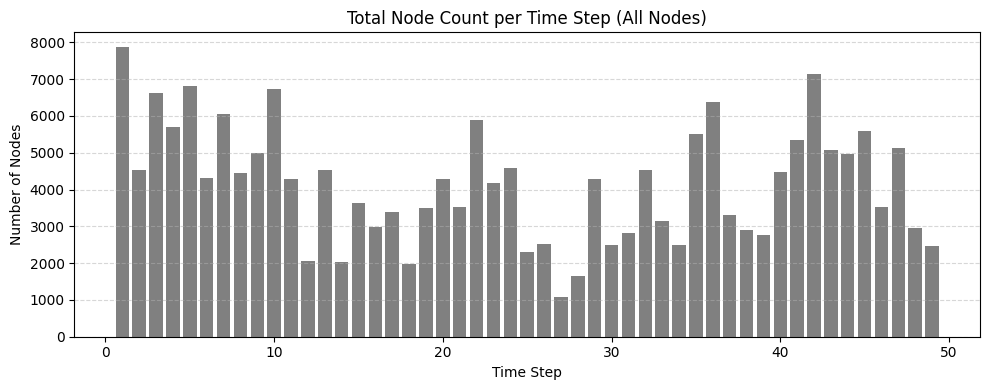

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assumes timestamps were already attached as: data.node_times
timestamps = data.node_times.cpu().numpy()

# Count number of nodes at each time step
unique_steps, counts = np.unique(timestamps, return_counts=True)
node_volume_df = pd.DataFrame({
    "time_step": unique_steps,
    "node_count": counts
})

# Plot node volume per time step
plt.figure(figsize=(10, 4))
plt.bar(node_volume_df["time_step"], node_volume_df["node_count"], color="gray")
plt.title("Total Node Count per Time Step (All Nodes)")
plt.xlabel("Time Step")
plt.ylabel("Number of Nodes")
plt.grid(True, axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


### 5.9 Normalised Time Distribution of FP/FN Errors

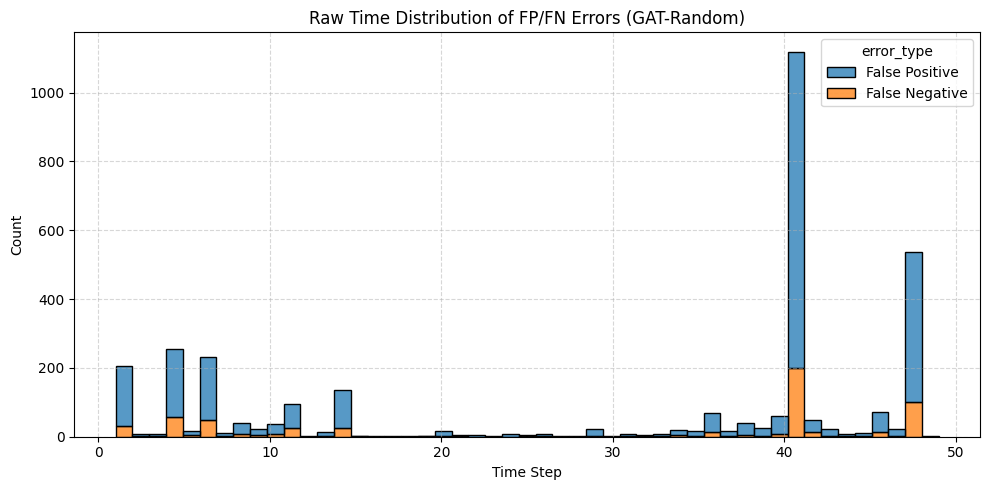

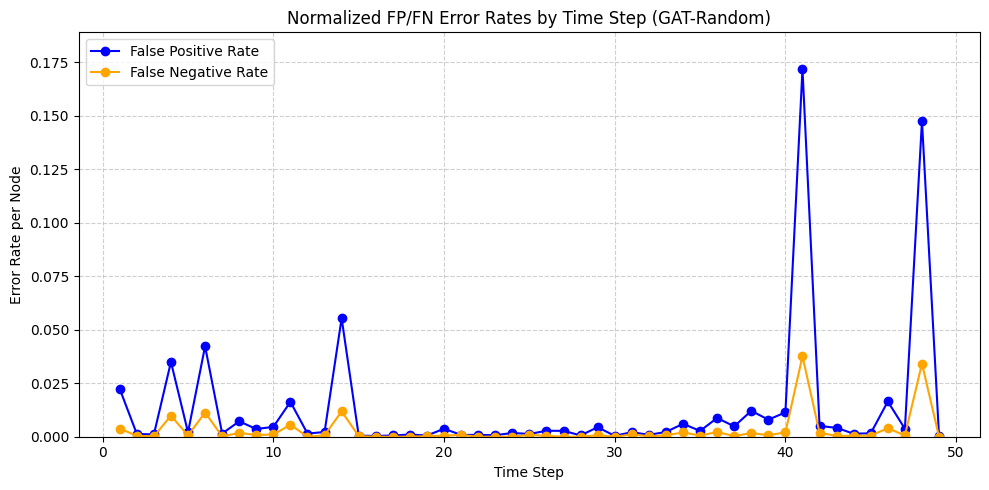

In [10]:
from evaluation_pipeline import plot_fp_fn_time_distributions
plot_fp_fn_time_distributions(data, seeds, model_dir, model_name="GAT-Random")


### 6. Save everything to JSON

In [ ]:
import os
import numpy as np
from sklearn.metrics import confusion_matrix
from evaluation_pipeline import export_full_evaluation_to_json

# --------------------------------------------
# Reconstruct confusion matrices (per seed)
# --------------------------------------------
conf_matrices = [
    confusion_matrix(y_true_all[i], y_pred_all[i])
    for i in range(len(seeds))
]

# --------------------------------------------
# Reconstruct FP/FN counts + time distributions
# using saved indices and timestamps
# --------------------------------------------
model_dir = "../models_v2/GAT"  # <-- change per model
fp_counts, fn_counts = [], []
fp_time_all, fn_time_all = [], []

timestamps = data.node_times.cpu().numpy()

for seed in seeds:
    base = os.path.join(model_dir, f"seed_{seed}")
    fp_idx = np.load(os.path.join(base, "fp_indices.npy"))
    fn_idx = np.load(os.path.join(base, "fn_indices.npy"))

    fp_counts.append(len(fp_idx))
    fn_counts.append(len(fn_idx))

    fp_time_all.extend(timestamps[fp_idx])
    fn_time_all.extend(timestamps[fn_idx])

# Convert to JSON-compatible native Python types
fp_time_all = [int(t) for t in fp_time_all]
fn_time_all = [int(t) for t in fn_time_all]

# --------------------------------------------
# Final export to JSON files
# --------------------------------------------
export_full_evaluation_to_json(
    seed_metrics=seed_metrics,
    conf_matrices=conf_matrices,
    fp_counts=fp_counts,
    fn_counts=fn_counts,
    fp_time_all=fp_time_all,
    fn_time_all=fn_time_all,
    output_dir=model_dir
)

TypeError: Object of type int64 is not JSON serializable